<div class='bar_title'></div>

*Enterprise AI*

# Exploratory Data Analysis

Max & Jonas

Summer Semester 24

<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/d3.png?raw=true" style="width:20%; float:left;" />

## Data Preprocessing

We first need to import the necessary libraries for our data preprocessing task. We will first use the `pandas` package, which can be imported by running the command `import pandas as pd`. Thereby, `as` is used to give the package a nickname, making it easier to refer to the package later in the code.

In [2]:
!pip install matplotlib
!pip install seaborn
import pandas as pd
from matplotlib import pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


Next, we will load our dataset, which is stored as a CSV (comma-separated values) file. This can be done using the command `pd.read_csv("./folder/filename.csv")`. The `./` indicates that the file is stored in the current directory. If the file is stored in a different directory, you can extend the path to the file accordingly. As a result of this command, the dataset is loaded into a pandas dataFrame.

In [4]:
dataset = pd.read_csv("data/historical_data.csv")
dataset

,timestamp,weather_condition,temperature,pedestrians_count,location_name,hour,day,month,dayofweek,ferien_bw,...,ferien_ni,ferien_nw,ferien_rp,ferien_sl,ferien_st,ferien_sn,ferien_sh,ferien_th,fussballspiel,deutschlandspiel
0,2024-01-20 15:00:00,clear-day,-1.0,4337,Schönbornstraße,15,20,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-20 16:00:00,clear-night,-3.0,3699,Schönbornstraße,16,20,1,5,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-20 17:00:00,clear-night,-6.0,2332,Schönbornstraße,17,20,1,5,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-20 18:00:00,clear-night,-7.0,1383,Schönbornstraße,18,20,1,5,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-20 19:00:00,clear-night,-8.0,479,Schönbornstraße,19,20,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,2024-07-08 08:00:00,partly-cloudy-day,21.0,873,Spiegelstraße,8,8,7,0,0,...,1,1,0,0,1,1,0,1,0,0
13554,2024-07-08 08:00:00,partly-cloudy-day,21.0,1693,Kaiserstraße,8,8,7,0,0,...,1,1,0,0,1,1,0,1,0,0
13555,2024-07-08 09:00:00,partly-cloudy-day,22.0,2223,Schönbornstraße,9,8,7,0,0,...,1,1,0,0,1,1,0,1,0,0
13556,2024-07-08 09:00:00,partly-cloudy-day,22.0,967,Spiegelstraße,9,8,7,0,0,...,1,1,0,0,1,1,0,1,0,0


In [5]:
dataset.weather_condition.unique()

array(['clear-day', 'clear-night', 'partly-cloudy-night',
       'partly-cloudy-day', 'cloudy', 'rain', 'wind', 'fog', 'snow', nan],
      dtype=object)

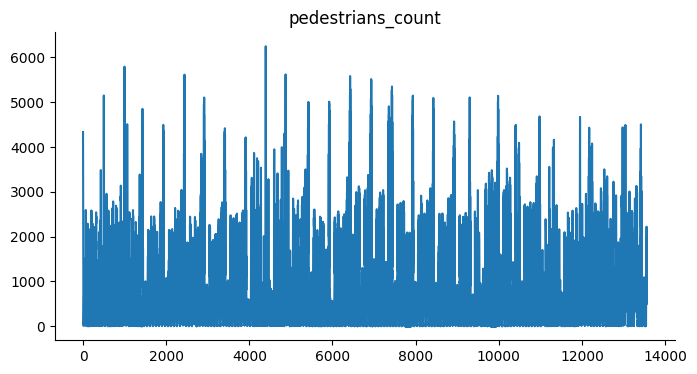

In [6]:
from matplotlib import pyplot as plt
dataset['pedestrians_count'].plot(kind='line', figsize=(8, 4), title='pedestrians_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
dataset['weather_condition'].value_counts()

weather_condition
cloudy                 4044
rain                   2465
partly-cloudy-day      2235
clear-night            1614
clear-day              1524
partly-cloudy-night    1477
snow                     81
wind                      3
fog                       3
Name: count, dtype: int64

In [8]:
average_pedestrians_by_weather = dataset.groupby(['location_name', 'weather_condition'])['pedestrians_count'].mean().unstack().reset_index()
print(average_pedestrians_by_weather)

weather_condition    location_name    clear-day  clear-night      cloudy  \
0                     Kaiserstraße  1229.190945   216.749071  745.812454   
1                  Schönbornstraße  1588.931102   209.574349  861.958395   
2                    Spiegelstraße   903.454724   134.970260  489.150482   

weather_condition    fog  partly-cloudy-day  partly-cloudy-night         rain  \
0                  111.0        1422.550336           235.197980   911.899027   
1                   63.0        1806.120805           218.736196  1026.059683   
2                   21.0         999.451007           144.486815   559.630170   

weather_condition        snow    wind  
0                  946.481481  1286.0  
1                  871.481481  1420.0  
2                  569.370370   811.0  


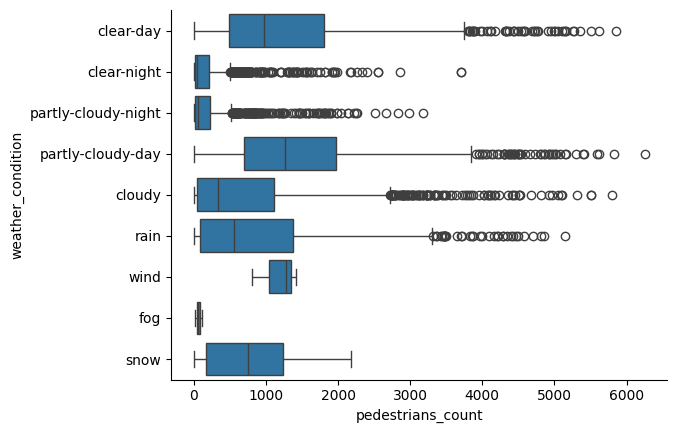

In [9]:
import seaborn as sns

sns.boxplot(x = 'pedestrians_count', y = 'weather_condition', data = dataset)
plt.gca().spines[['top', 'right']].set_visible(False)

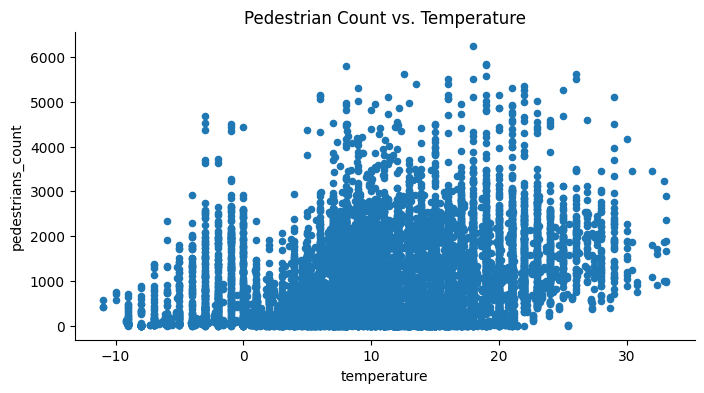

In [10]:
import matplotlib.pyplot as plt
dataset.plot.scatter(x='temperature', y='pedestrians_count', figsize=(8, 4), title='Pedestrian Count vs. Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
# Calculate the min, max, and average temperature for each weather condition
grouped_data = dataset.groupby('weather_condition')['temperature'].agg(['min', 'max', 'mean'])
# Print the results
print(grouped_data)

                      min   max       mean
weather_condition                         
clear-day           -10.0  30.0  14.127165
clear-night         -11.0  20.8   5.987175
cloudy               -6.9  33.1   8.483061
fog                   3.1   3.1   3.100000
partly-cloudy-day    -4.0  32.4  14.788725
partly-cloudy-night  -9.0  23.9   7.706703
rain                  0.7  30.0  11.566897
snow                 -5.0   4.0  -0.181481
wind                 12.0  12.0  12.000000


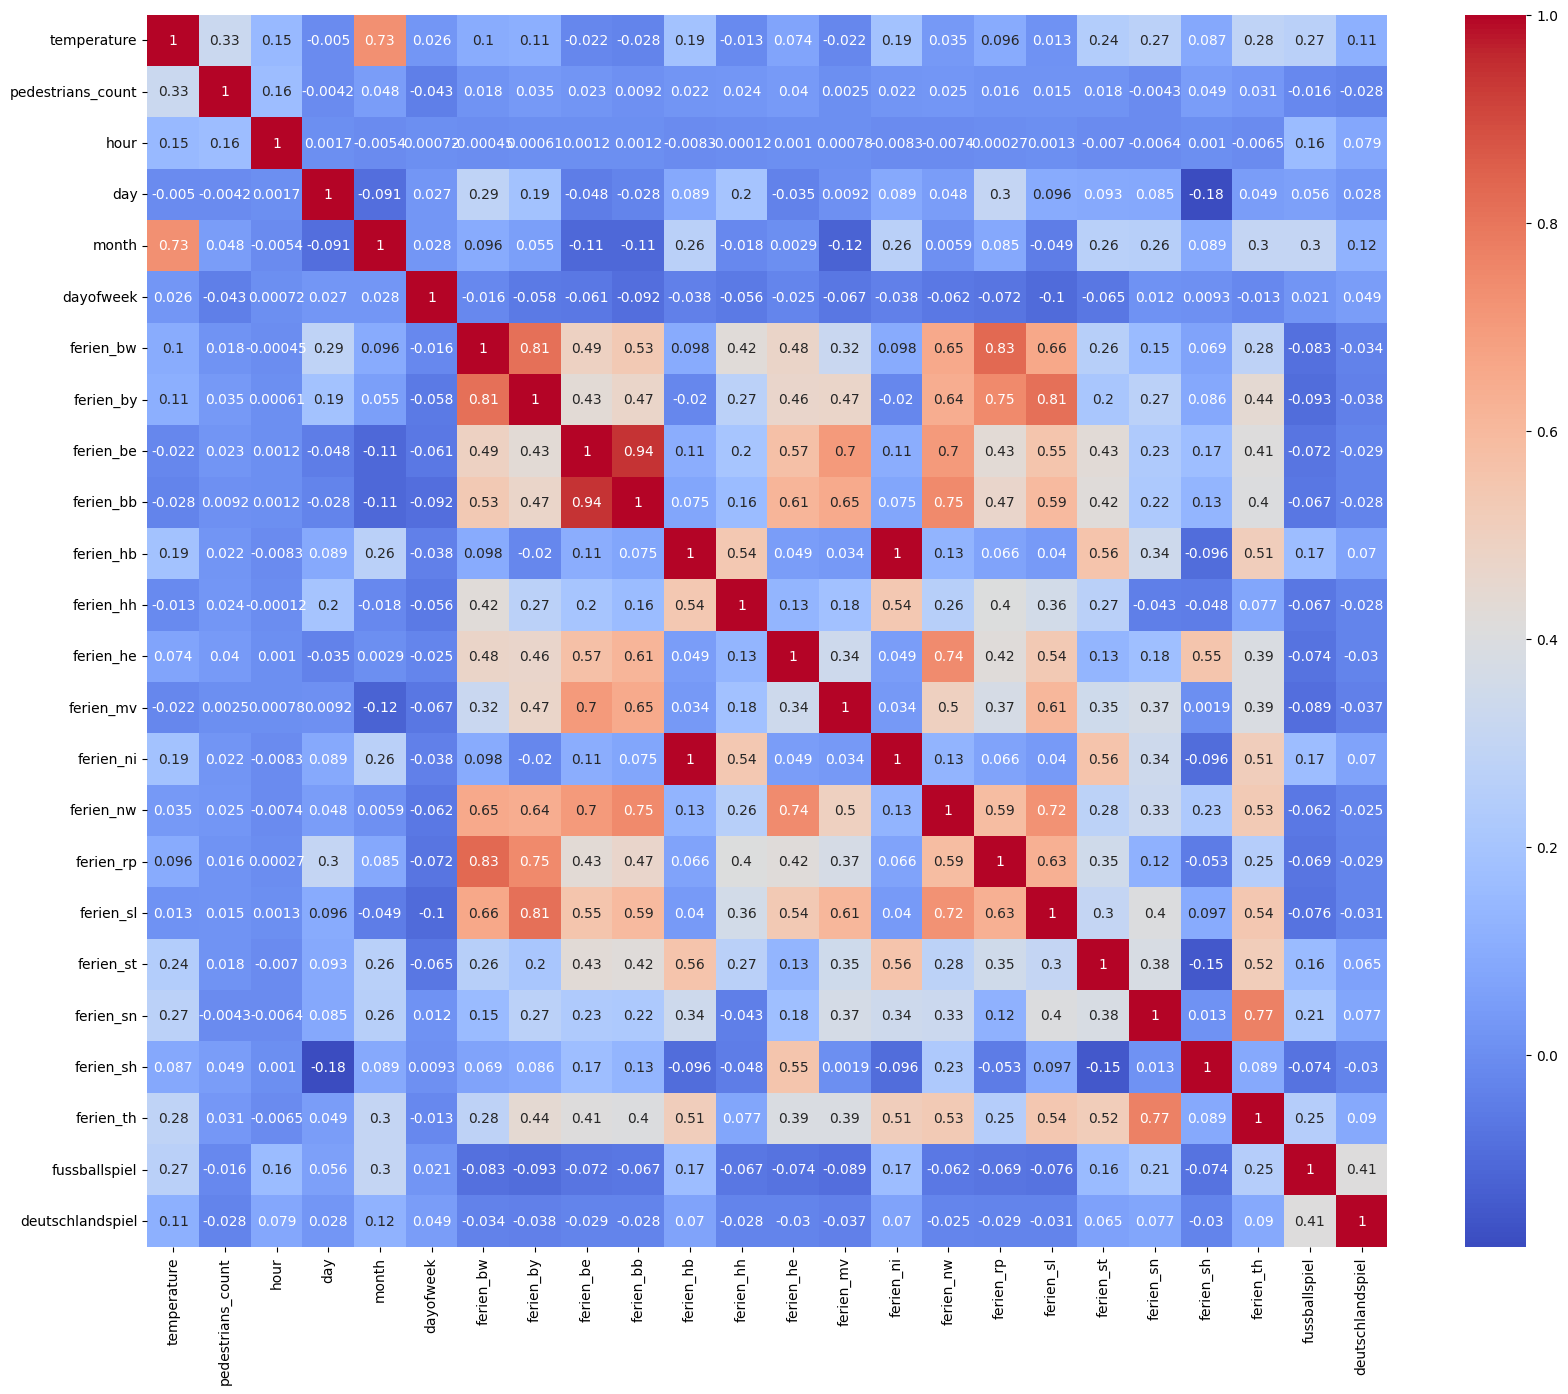

In [13]:
import matplotlib.pyplot as plt
# Get all columns except for "timestamp"
numeric_columns = dataset.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != 'timestamp']

# Create the correlation plot
plt.figure(figsize=(20, 16))
sns.heatmap(dataset[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()


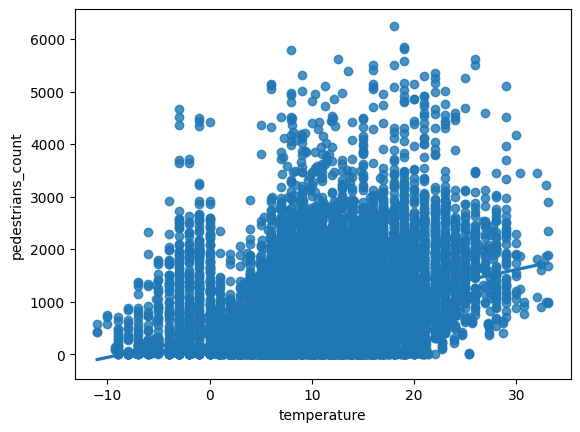

In [14]:
import matplotlib.pyplot as plt
sns.regplot(x="temperature", y="pedestrians_count", data=dataset)
plt.show()


In [15]:
# Define the date ranges
date_ranges = [
    ('2024-01-01T00:00:00+02:00', '2024-01-31T24:00:00+02:00'),
    ('2024-02-01T00:00:00+02:00', '2024-02-28T24:00:00+02:00'),
    ('2024-03-01T00:00:00+02:00', '2024-03-31T24:00:00+02:00'),
    ('2024-04-01T00:00:00+02:00', '2024-04-30T24:00:00+02:00'),
    ('2024-05-01T00:00:00+02:00', '2024-05-31T24:00:00+02:00'),
    ('2024-06-01T00:00:00+02:00', '2024-06-30T24:00:00+02:00'),
]

# Initialize an empty DataFrame
avg_counts_by_month = pd.DataFrame()

# Loop through each date range
for start_date, end_date in date_ranges:
    # Filter the dataset for the current date range
    df_filtered = dataset[(dataset['timestamp'] >= start_date) & (dataset['timestamp'] <= end_date)]

    # Calculate the average pedestrian count and average temperature for each location name
    # Use a list to select multiple columns
    avg_counts_by_location = df_filtered.groupby('location_name')[['pedestrians_count', 'temperature']].mean()

    # Rename the columns to include the date range
    avg_counts_by_location.columns = [f'{col}_{start_date[:10]}' for col in avg_counts_by_location.columns]

    # Join the current DataFrame with the overall DataFrame
    avg_counts_by_month = avg_counts_by_month.join(avg_counts_by_location, how='outer')

# Print the combined DataFrame
print(avg_counts_by_month)

"""As we can see, the temperature rise from january till june and with this the pedestrian count in a same way. Only in may and june the pedestrian counts dont rise as much or arent rising at all."""


                 pedestrians_count_2024-01-01  temperature_2024-01-01  \
location_name                                                           
Kaiserstraße                       750.434722                1.638194   
Schönbornstraße                    875.745833                1.638194   
Spiegelstraße                      484.708333                1.638194   

                 pedestrians_count_2024-02-01  temperature_2024-02-01  \
location_name                                                           
Kaiserstraße                       804.354938                7.502778   
Schönbornstraße                    914.655864                7.502778   
Spiegelstraße                      496.410494                7.502778   

                 pedestrians_count_2024-03-01  temperature_2024-03-01  \
location_name                                                           
Kaiserstraße                       780.169492                8.341949   
Schönbornstraße                    985.724187    

'As we can see, the temperature rise from january till june and with this the pedestrian count in a same way. Only in may and june the pedestrian counts dont rise as much or arent rising at all.'

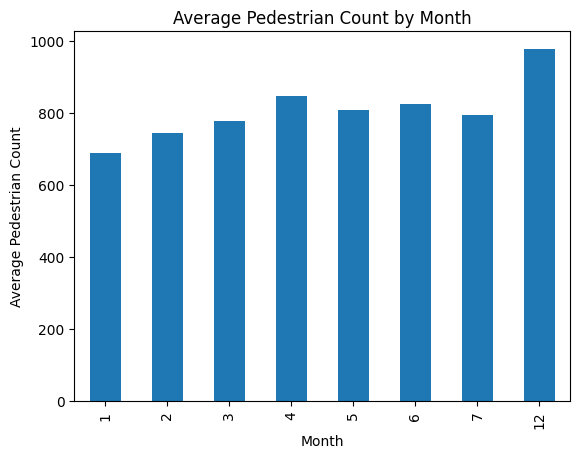

In [16]:
# prompt: average pedestrian count of  the column month  equals 1, 2, 3, 4, 5 and 6 in a plot

import matplotlib.pyplot as plt
# Calculate the average pedestrian count for each month
avg_counts_by_month = dataset.groupby(dataset['month'])['pedestrians_count'].mean()

# Plot the average pedestrian count for each month
avg_counts_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Pedestrian Count')
plt.title('Average Pedestrian Count by Month')
plt.show()

In [17]:
# prompt: avarage pedestrian count when ferien_bw == 1, ferien_by == 1, ferien_bw == 1, ferien_be == 1, ferien_bb == 1, ferien_he == 1, ferien_mv == 1, ferien_hh== 1, ferien_hb == 1, ferien_ni == 1,ferien_nw == 1, ferien_rp == 1, ferien_sl == 1, ferien_sh== 1, ferien_st== 1, ferien_sn== 1, ferien_th == 1

ferien_cols = ['ferien_bw', 'ferien_by', 'ferien_be', 'ferien_bb', 'ferien_he', 'ferien_mv', 'ferien_hh',
                'ferien_hb', 'ferien_ni', 'ferien_nw', 'ferien_rp', 'ferien_sl', 'ferien_sh',
                'ferien_st', 'ferien_sn', 'ferien_th']

avg_counts_by_ferien = dataset.groupby(ferien_cols)['pedestrians_count'].mean()

print(avg_counts_by_ferien)

"""we can see that there is a higher pedestrian count when there are holidays in a federal state. Some pedestian counts are just slightly higer than normal for holidays in Sachsen or Mecklenburg-Vorpommern others are way higher like Bayern, Badenw-Würtemberg or Hessen."""

ferien_bw  ferien_by  ferien_be  ferien_bb  ferien_he  ferien_mv  ferien_hh  ferien_hb  ferien_ni  ferien_nw  ferien_rp  ferien_sl  ferien_sh  ferien_st  ferien_sn  ferien_th
0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0             762.469682
                                                                                                                                                          1          0             645.218254
                                                                                                                                                                     1             807.010526
                                                                                                                                    1          0          0          0             756.716270
                                                                 

'we can see that there is a higher pedestrian count when there are holidays in a federal state. Some pedestian counts are just slightly higer than normal for holidays in Sachsen or Mecklenburg-Vorpommern others are way higher like Bayern, Badenw-Würtemberg or Hessen.'

In [18]:
average_pedestrians_count_by_location = dataset.groupby('location_name')['pedestrians_count'].mean()

print(average_pedestrians_count_by_location)

location_name
Kaiserstraße       819.576923
Schönbornstraße    976.293153
Spiegelstraße      550.528423
Name: pedestrians_count, dtype: float64


In [19]:
grouped_data = dataset.groupby('location_name').agg(
    fussballspiel_avg=('pedestrians_count', lambda x: x[dataset['fussballspiel'] == 1].mean()),
    deutschlandspiel_avg=('pedestrians_count', lambda x: x[dataset['deutschlandspiel'] == 1].mean())
)

print(grouped_data)

"""The data also shows that during footballgame, the pedestrian countz is lower than usuall, and way lower when germany wa playing.
This could either mean that there are generally less persons in the streets or that there are no public viewing spots in those streets
"""

                 fussballspiel_avg  deutschlandspiel_avg
location_name                                           
Kaiserstraße            735.950000            539.000000
Schönbornstraße         916.184615            568.794118
Spiegelstraße           489.538071            358.485714


'The data also shows that during footballgame, the pedestrian countz is lower than usuall, and way lower when germany wa playing.\nThis could either mean that there are generally lees persons in the streets or that there are no public viewing spots in those streets\n'